In [1]:
import os
import pandas as pd
import numpy as np
import mxnet as mx
from utils import check_dir
from memory import Memory
from utils import create_input, translate_state
from evaluation_mxnet import evaluate
from mxnet import gluon, nd, autograd
from environments.SimpleEnv import SimpleEnv
from model.simple_stack import SimpleStack
from PIL import Image

/home/seventheli/.local/lib/python3.8/site-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.0` and `torch==1.10.0+cu113` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [2]:
agent_view = 5
map_size = 20
rounds = 5
ctx = mx.cpu()
env = SimpleEnv(display=False, agent_view=agent_view, map_size=map_size)
model = SimpleStack()
model.load_parameters("./model_save/model_test.params", ctx)
save = "./data_save/"
print_action=False

In [3]:
for i in os.listdir(save):
    os.remove(save + i) 

In [4]:
avg_extrinsic_reward = []
avg_reward_rate = []
all_actons = []

In [5]:
for epoch in range(rounds):
    env.reset_env()
    done = 0
    step = 0
    while not done:
        step += 1
        data = create_input([translate_state(env.map.state())])
        data = [nd.array(i, ctx=ctx) for i in data]
        pred = model(data)
        action = int(nd.argmax(pred, axis=1).asnumpy()[0])
        action = int(nd.argmax(pred, axis=1).asnumpy()[0])
        all_actons.append(action)
        old, new, reward, done = env.step(action)
        if print_action:
            print(pred, reward, env.map.battery)
        if save is not None:
            img = Image.fromarray(env.map.grid.render(10,env.map.agent_pos,env.map.agent_dir), 'RGB')
            pred = [str(x)[0:5] for x in pred.asnumpy().tolist()[0]]
            filename = str(epoch) + "-" + str(step) + "-" + str(reward) + "-" + "_".join(pred) + ".jpg"
            img.save(save + "/" + filename)
    avg_reward_rate.append(env._rewards[-1] / sum([abs(i) for i in env._rewards]))
    avg_extrinsic_reward.append(env.map._extrinsic_reward())

In [6]:
pd.DataFrame(all_actons)[0].value_counts()

1    459
0     41
Name: 0, dtype: int64

In [7]:
np.mean(avg_extrinsic_reward), np.mean(avg_reward_rate)

(0.015384615384615385, -0.01899774787165276)

In [8]:
import seaborn
import tqdm

100%|██████████| 4/4 [00:00<00:00, 10936.91it/s]


<AxesSubplot:>

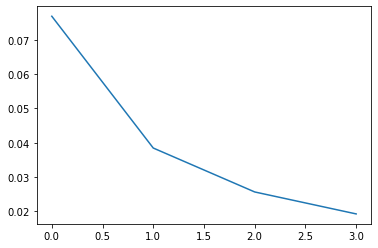

In [9]:
y = []
for i in tqdm.tqdm(range(1, len(env.detect_rate))):
    y.append(np.mean(env.detect_rate[:i]))
seaborn.lineplot(x=range(len(y)), y=y)

100%|██████████| 4/4 [00:00<00:00, 15477.14it/s]


<AxesSubplot:>

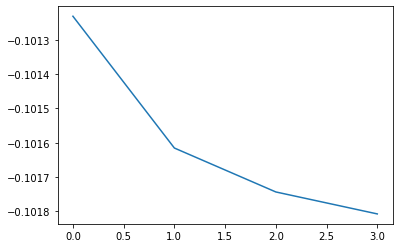

In [10]:
y = []
for i in tqdm.tqdm(range(1, len(env.rewards))):
    y.append(np.mean(env.rewards[:i]))
seaborn.lineplot(x=range(len(y)), y=y)

In [11]:
env._rewards

[-0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.001,
 -0.003,
 -0.005,
 -0.007,
 -0.009000000000000001,
 -0.011,
 -0.013000000000000001,
 -0.015,
 -0.017,
 -0.019,
 -0.021,
 -0.023,
 -0.025,
 -0.027,
 -0.029,
 -0.031,
 -0.033,
 -0.035,
 -0.037,
 -0.039,
 -0.041,
 -0.043000000000000003,
 -0.045,
 -0.047,
 -0.049,
 -0.051000000000000004,
 -0.053,
 -0.055,
 -0.057,
 -0.059000000000000004,
 -0.061,
 -0.063,
 -0.065,
 -0.067,
 -0.069,
 -0.07100000000000001,
 -0.073,
 -0.075,
 -0.077,
 -0.079,
 -0.081,
 -0.083,
 -0.085,
 -0.087,
 -0.089,
 -0.091,
 -0.093,
 -0.095,
 -0.097,
 -0.099,
 -0.101,
 -0.103,
 -0.105,
 -0.107,
 -0.109,
 -0.111,
 -0.113,
 -0.115,
 -0.117,
 -0.119,
 -0.121,
 -0.123,
 -0.125,
 -0.127,
 -0.129,
 -0.131,
 -0.133,
 -0.135,
 -0.137,
 -0.139,
 -0.14100000000000001,
 -0.143,
 -0.145,
 -0.147,
 -0.149,
 -0.151,
 -0.153,
 -0.155,
 -0.157,
 -0.159,
 -0.161,
 -0.163,
 -0.165,
 -0.16